In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [458]:
# Build an example dataframe

def rd(N):
    return np.random.normal(0,1,N)

def mult_coef(df, coef):
    def f(row,coef):
        v = []
        for i, c in enumerate(coef[:-1]):
            if isinstance(c, (list, tuple) ):
                v.append(c[int(row.cat1)] )
            else:
                v.append(row[i] * c )

        return pd.Series(v + [coef[-1]])

    t = df.apply(f, coef=coef, axis=1) 
    t.columns = list(df.columns) +['const']
    return t

def make_df(coef, N=1000):
    df =  pd.DataFrame({
        'cat1': np.random.choice( [0,1], N),
        'cat2': np.random.choice( [0,1], N),
        'cat3': np.random.choice( [0,1], N),
        'r1': rd(N),
        'r2': rd(N),
        'r3': rd(N),
        'r4': rd(N),
        'r5': rd(N),
        'r6': rd(N),
        'r7': rd(N),
        'r8': rd(N),
        'e': rd(N),  # Error
    })
    
    mc = mult_coef(df, coef)

    df['y'] = mc.sum(axis=1)
    
    return df

coef = [
    10, # cat1
    0, # cat2
    0, # cat3
    1, # r1
    0, # r2
    0, # r3
    0, # r4
    0, # r5
    0, # r6
    0, # r7
    0, # r8
    0, # e
    0 # constant
]



  
def regress(coef, X=None, N=1000):

    if X is None:
        X = make_x(N=N)
    
    Xc = mult_coef(X, coef)
    
    y = Xc.sum(axis=1)

    x_cols = list(X.columns)[:-1]

    X_ = pd.get_dummies(X[x_cols], columns=['cat1','cat2','cat3'])
    
    #X_ = sm.add_constant(X_)
    
    m = OLS(y, X_ ).fit()
    
    return m, y, X_, Xc
    
df = make_df(coef)
df

,cat1,cat2,cat3,r1,r2,r3,r4,r5,r6,r7,r8,e,y
0,0,1,0,0.490790,0.127006,-0.003909,-0.116856,-0.142842,-0.238785,-0.594556,0.037857,1.995539,0.490790
1,0,1,1,0.655895,1.264041,0.159750,1.236793,-0.385142,-0.538094,1.400596,0.691720,0.599090,0.655895
2,1,1,0,-1.322965,0.692116,0.833206,-0.175576,1.623169,-0.334760,-0.563879,-1.027443,-0.837178,8.677035
3,1,1,1,-0.932801,0.259903,1.994803,1.864238,0.697498,0.295359,-0.764927,-0.970129,-1.343292,9.067199
4,1,1,0,1.600510,1.112320,-0.817501,-1.166212,-0.067560,-1.894946,0.200398,-1.695131,-0.884579,11.600510
5,1,1,0,1.849202,0.560737,-0.102784,2.199036,-0.218482,0.046426,-1.706670,-0.498086,-1.759485,11.849202
6,1,0,0,1.551181,0.878191,-1.243976,2.380595,0.351948,0.083425,-0.549326,-0.058692,-0.732034,11.551181
7,0,1,0,-2.203819,-1.190302,1.218957,-1.253573,-0.713805,0.451454,1.861727,-0.623372,0.161565,-2.203819
8,0,1,1,-0.529965,-0.375955,0.022317,1.046604,0.489630,-1.468279,0.018422,0.579127,0.907997,-0.529965
9,0,1,1,0.479207,-2.070853,0.212599,1.246819,-0.341641,-1.406001,-0.584194,0.253680,1.711711,0.479207


In [427]:
# An R^2 of .5 occurs when the variance of the error is the same
# as the variance of th independent variable, for one independent variable. 

coef = [0, 0, 0, # Cat
        10, 0, 0, 0, 0, 0, 0, 0, # r
        10, 0] # Error, constant



m, y, X, Xc = regress(coef)
m.rsquared_adj

0.5165516222875943

In [402]:
# With 3 indepndent and 1 error, .75
coef = [0, 0, 0, # Cat
        10, 10, 10, 0, 0, 0, 0, 0, # r
        10, 0] # Error, constant

m, y, X, Xc = regress(coef)
m.rsquared_adj


0.7490062879107533

In [403]:
# And with 7/8, sbout .875. So, it is ratiometric
coef = [0, 0, 0, # Cat
        10, 10, 10, 10, 10, 10, 10, 0, # r
        10, 0] # Error, constant

m, y, X, Xc = regress(coef)
m.rsquared_adj


0.8739902258841965

In [404]:
def run_regr():
    for r in range(1,20,5):
        for e in range(1,20,5):
            coef = [0, 0, 0, # Cat
                    r, 0, 0, 0, 0, 0, 0, 0, # r
                    e, 0] # Error, constant

            m, y, X, Xc = regress(coef)
            yield r, e, m.rsquared_adj
            
x = pd.DataFrame(list(run_regr()), columns = 'r e r2'.split())

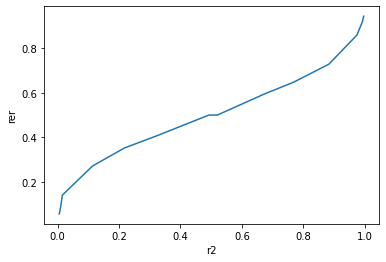

In [405]:
# When r and e are not the same magnitude, the relationship to r2 isn't
# linear, but it is reasonable approximation. 
x['rer'] = (1-(x.e/(x.e+x.r)))
x = x.sort_values('r2')
x['rr'] = np.sqrt(x.r2)
x['rer_cs'] = x.rer.cumsum()
x['rer_df'] = x.rer.diff()
x['er'] = (x.e/x.r)
x['r2i'] = 1-x.r2
sns.lineplot('r2','rer',  data=x)

In [454]:
X = make_x(N=N)

coef = [10, 0, 0, # Cat
        10, 0, 0, 0, 0, 0, 0, 0, # r
        2, 5] # Error, constant

m, y, X_, Xc = regress(coef, X=X)
m1, y1, X1, Xc1 = regress(coef, X=X[X.cat1==1])
m0, y0, X0, Xc0 = regress(coef, X=X[X.cat1==0])


print(m0.rsquared_adj, m1.rsquared_adj )
print(len(X0), len(X1))
m.summary()

0.9588746492109381 0.9596593682698656
489 511


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2646.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:49:27   Log-Likelihood:                -2115.8
No. Observations:                1000   AIC:                             4256.
Df Residuals:                     988   BIC:                             4315.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
r1             9.9523      0.065    153.191      0.000       9.825      10.080
r2            -0.0066      0.064     -0.104      0.917      -0.132       0.119
r3            -0.0403      0.061     -0.657      0.511      -0.161       0.080
r4            -0.0076      0.067     -0.112      0.911      -0.140       0.125
r5             0.0426      0.063      0.677      0.498      -0.081       0.166
r6            -0.0210      0.063     -0.335      0.738      -0.144       0.102
r7            -0.0290      0.066     -0.437      0.662      -0.159       0.101
r8            -0.0235      0.062     -0.381      0.704      -0.145       0.098
cat1_0        -1.6255      0.068    -23.877      0.000      -1.759      -1.492
cat1_1         8.3148      0.067    123.907      0.000       8.183       8.447
cat2_0         3.3500      0.067     50.368      0.000       3.219       3.481
cat2_1         3.3394      0.069     48.494      0.000       3.204       3.475
cat3_0         3.2105      0.068     47.509      0.000       3.078       3.343
cat3_1         3.4789      0.068     51.143      0.000       3.345       3.612
==============================================================================
Omnibus:                        4.307   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.350
Skew:                          -0.160   Prob(JB):                        0.114
Kurtosis:                       2.952   Cond. No.                     6.74e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [443]:
y1

2       8.829105
5       8.628183
7      42.165711
8      27.879851
10     -1.645016
11     14.300682
13     40.245654
14     24.504001
15      9.889721
17    -13.965856
18     50.904499
19     21.863609
25     13.799610
26     13.861925
27      1.270318
28     18.019991
29     17.620244
30     38.910733
33     -1.786277
35      9.899751
36     21.841189
37     25.951245
38     35.657130
39      4.153875
40    -11.940675
41      4.442052
42     23.549432
43      4.258253
46     24.789806
47     46.326878
         ...    
933    29.399659
934    29.093685
936     2.627017
939    40.619240
946    21.076742
947     7.895729
948    31.433238
950    34.789686
951    26.133319
955    15.371239
958   -20.467646
960    37.929945
962    27.238919
964    28.863835
969    -2.836567
971    -0.665103
972    20.021025
976    29.370591
977    20.634909
979    24.277959
980    47.321954
981    34.620941
983    -5.155256
986    31.645413
987    31.107869
990    12.474860
992    24.196680
996    19.0672

In [380]:
len(X1)

500

In [167]:
X = make_x()

coef = [10, 10, 10, # Cat
        10, [0,10], [10,0], 0, 0, 0, 0, 0, # r
        7, 0] # Error, constant

def regress(X, coef, cols=None):
    if cols is None:
        cols = list(X.columns)[:-1] # Exclude the error

    y = X.apply(f, coef=coef, axis=1) 

    m = OLS(y, sm.add_constant(X[cols])).fit()
    return m.rsquared_adj

regress(X[X.cat1 == 0], coef), regress(X[X.cat1 == 1], coef)


(0.8859189036150446, 0.8674307765110169)

In [143]:
X = make_x()

In [144]:
X0 = X[X.cat1 == 0]
X1 = X[X.cat1 == 1]

y = X1.apply(f, coef=coef, axis=1) 
cols = list(X.columns)[:-1]
m = OLS(y, sm.add_constant(X1[cols])).fit()

In [158]:
yh1 = m.predict(X1[cols]).dropna()
yh0 = m.predict(X0[cols]).dropna()

In [166]:
X0.apply(f, coef=coef, axis=1).corr(yh0)

0.8617007249189771

In [160]:
yh1[:400].corr(yh0[:400])

nan

In [156]:
len(yh0)

505

In [161]:
len(yh1)

495